# Probability and Statistics (Hacker Statistics)
### Content of Learning Notes: 
* Random Lists
* Random Walks
* Bernoulli Trials
* CHECK
* Binomial and Poisson Distributions

### Introduction to basics
Numpy's sub-package can generate random floats and integers. 

##### Pseudo-random numbers
To ensure consistency and hence reproducibility of a (given) data set, it is important to set the random seed manually in the beginning, before any other np.random-function is used. Once, the seed is set, randomly generated numbers won't change, regardless how many times you run the cell.

Some basic functions are:
* np.random.rand() : generates a float between 0 and 1. 
* np.random.random() : also generates a float between 0 and 1. 
* np.random.randint() : generates an integer within a specified range.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed()

### Random List
A random list is a list of randomly selected list items thatdo not depend on each other. 

##### Example: 
You throw 6 dices a couple of times. What is the likelihood for each cube face to occure multiple times if you repeate the simulation a couple of times? 

##### Distribution of Random Lists
The more often you repeat a simulation, the more accurate is the output. 
It makes sense that the likelihood for each cube face (equally high bars) is the same. However, you get closer to this outcome the more repitions of the simulation you perform.

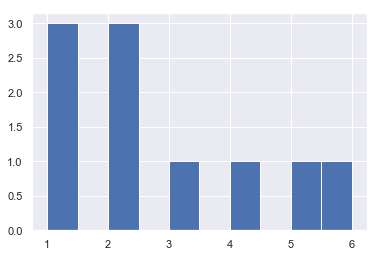

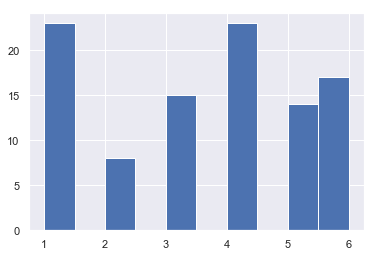

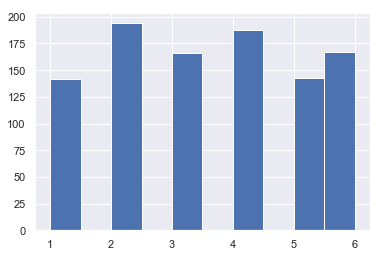

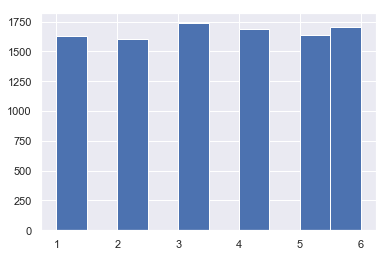

In [2]:
# Amount of simulation-repetitions to be performed
a = 10
b = 100
c = 1000
d = 10000

roll_a = []
roll_b = []
roll_c = []
roll_d = []

# Simulations:
for i in range(a):
    roll_a.append(np.random.randint(1,7))
for i in range(b):
    roll_b.append(np.random.randint(1,7))
for i in range(c):
    roll_c.append(np.random.randint(1,7))
for i in range(d):
    roll_d.append(np.random.randint(1,7))

# Visualization of Simulations

#plt.subplots(1,2,2)
sns.set()
_ = plt.hist(roll_a)
plt.show()
#plt.subplots(2,2,2)
_ = plt.hist(roll_b)
plt.show()
#plt.subplots(2,2,2)
_ =  plt.hist(roll_c)
plt.show()
#plt.subplots(2,2,2)
_ =  plt.hist(roll_d)
plt.show()

##### Calculate the probability
The probability for each cube face is simply the proportion of counts of each one within the correspondent list of simulation-repetitions. 

In [3]:
print('The probability for each cube face if the simulation is repeated' + str(a) + ' times is:')
for i in range(1,7):
    count = roll_a.count(i)/a*100
    print(str(i)+': ' +str(round(count)) + '%')

print('Whereas the probabilities are the following if the simulation is repeated ' + str(d) + ' times:')
for i in range(1,7):
    count = roll_d.count(i)/d*100
    print(str(i)+': ' +str(round(count))+'%')

The probability for each cube face if the simulation is repeated10 times is:
1: 30%
2: 30%
3: 10%
4: 10%
5: 10%
6: 10%
Whereas the probabilities are the following if the simulation is repeated 10000 times:
1: 16%
2: 16%
3: 17%
4: 17%
5: 16%
6: 17%


### Random Walk 

In contrast to random list, the value of a list items in a random walk depends on the previous ones. 

##### Example: 

You are in the empire state building on the fifth stair/setp and you will throw a dice 100 times: 
* If it is 1 or 2 you'll go one step down. 
* If it is 3,4 or 5 you'll go one step up. 
* If you throw a 6, you'll throw the dice again and will walk the resulting number of eyes up. 

Consider that you can't go lower then step number 0. 

1% of falling down the stairs when you make a move. 
Falling down means that you have to start again from step 0. 

You bed that you'll reach 60 steps high. What is the chance to win the bet?

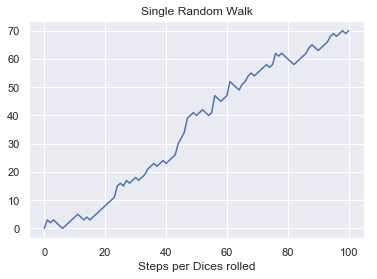

In [4]:
np.random.seed(123)
random_walk = [0]

for i in range(100):
    
    # Define the starting point of the random walk (last element of the list)
    step = random_walk[-1]
    dice = np.random.randint(1,7)
    
    # Set the conditions for the next list items, which depend on previous ones.
    if dice <= 2 :
        # Consider that you cannot go below 0 (stay on 0 or go one down)
        step = max(0,step - 1)
    elif 2 < dice < 6 :
        step = step +1
    else :
        step = step + np.random.randint(1,7)

    # Implement clumsiness
    if np.random.rand()<0.001 :
        step = 0
    
    random_walk.append(step)

# Visualize the random walk 
sns.set()
_ = plt.plot(random_walk)
_ = plt.title('Single Random Walk')
_ = plt.xlabel('Steps per Dices rolled')
plt.show()

### Distribution ###
A single random walk is one thing, but that doesn't tell you if you have a good chance at winning the bet.

To get an idea about how big your chances are of reaching 60 steps, you can repeatedly simulate the random walk and collect the results. 

You just need another for loop around the code you already wrote.

In [5]:
# Initialize all_walks (that include all random_walk(s))
all_walks = []

# Simulate random walk 10 times
for i in range(10) :

    # Code from before
    random_walk = [0]
    for x in range(100) :
        step = random_walk[-1]
        dice = np.random.randint(1,7)

        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)
        random_walk.append(step)

    # Append random_walk to all_walks
    all_walks.append(random_walk)

print(len(all_walks))

10


### Visualization of all walks

Since, you should not rely on one single try, you should reproduce the sample all over again (what you just did before). 

To visualize all outcomes you need to convert the results into a numpy array. 

Furthermore, you should transpose the results to visualize the 100 steps made on the x axis, which give the result on the improvements made on the y-axis.

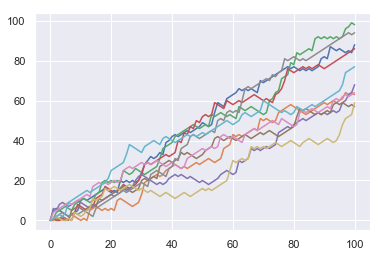

In [6]:
# Convert all_walks to Numpy array: np_aw
np_aw = np.array(all_walks)
# Transpose np_aw: np_aw_t
np_aw_t = np.transpose(np_aw)
# Plot np_aw_t and show
sns.set()
plt.plot(np_aw_t)
plt.show()

### Calculating the finale result

Even if the histogram above gives you an impression on how you will perform on your bet. The quantitative likelihood on your bet is still unclear.

The last item in each list represents the end point of a random walk. Determine with end points meet the condition (60 steps) and divide them by the total number of simulations.

In [7]:
ends = np_aw_t[-1]
n_success = 0

for i in ends: 
    if i > 59: 
        n_success += 1

print('The probability that you reach 60 steps is: ' + str(n_success/len(ends)*100) + '%')
print('Or simply use np.mean(): ' + str(np.mean(ends > 59)*100) + '%')

The probability that you reach 60 steps is: 80.0%
Or simply use np.mean(): 80.0%


### Bernoulli trials
A Bernoulli trial is an experiment that has two options (True and False). 

##### Example: Credit default
Flip of a possibly biased coins. Specifically, each coin flip has a probability p of landing heads (success) and probability 1−p of landing tails (failure). 
The following function performs n trials considering a success-probability p, which returns the number (count) of successes out of n trials.

A bank made 100 mortgage loans. It is possible that anywhere between 0 and 100 of the loans will be defaulted upon. You would like to know the probability of getting a given number of defaults, given a probability p (0.05) of a default.

To investigate this, you will first create a function of one simulation that includes n trails (100) and than perform r more simulations using a for loop over the function. 

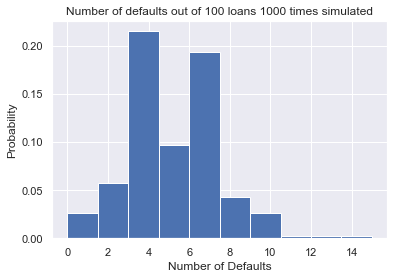

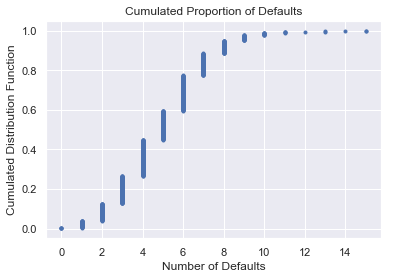

Probability of losing money is: 2.0%


In [8]:
np.random.seed(42)

# Define probability, trails and simulations
p = 0.05
n = 100
r = 1000 

# Initialize the number of defaults for multiple simulations
# creates an empty array that will be filled during the next for loop
n_defaults = np.empty(r)

# Create function for one simulation
for i in range(r):
    
    def perform_bernoulli_trials(n, p):
        # Initialize number of defaults
        defaults = 0
        for i in range(n):
            random_number = np.random.rand()
            # Within a total range between 0 and 1, the cumulated probability until p is p%
            if random_number < p:
                defaults += 1
        return defaults
    
    n_defaults[i] = perform_bernoulli_trials(n,p)

# The amount of defaults can be visulized in a histogram
sns.set()
_ = plt.hist(n_defaults, density = True)
_ = plt.title('Number of defaults out of ' +str(n)+ ' loans ' +str(r)+ ' times simulated')
_ = plt.xlabel('Number of Defaults')
_ = plt.ylabel('Probability')
plt.show()

# The cumulated distribution function (CDF) gives you the cumulated probability of defaults
# Eg. If interest rates (covered from remaining loans) are such that the bank will lose money if 10 or more are defaulted.
x = np.sort(n_defaults)
y = np.arange(1, len(x)+1)/len(x)

_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Number of Defaults')
_ = plt.ylabel('Cumulated Distribution Function')
_ = plt.title('Cumulated Proportion of Defaults')
plt.show()

# Compute the number of 100-loan simulations with 10 or more defaults
n_lose_money = np.sum(n_defaults >= 10) / len(n_defaults) *100
print('Probability of losing money is: ' +str(round(n_lose_money))+ '%')

###### More efficient Binomial distribution

It is computationally far more efficient, to use the np.random.binomial(n,p,size=r) function, than to simulating all of the Bernoulli trials manually.
Therefore, we will take more samples and plot the CDF. This CDF that you are plotting is that of the Binomial distribution.

We will plot the Probability Mass Function (PMF) of the Binomial distribution as a histogram. The trick is setting up the edges of the bins to pass to plt.hist() via the bins keyword argument. We want the bins centered on the integers. 

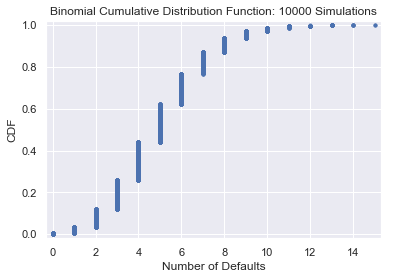

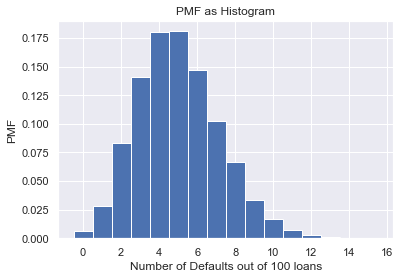

Probability of losing money is: 3.0%


In [21]:
# Define parameters
p = 0.05
n = 100
r = 10000 

# Take samples out of the binomial distribution: n_defaults
n_defaults = np.random.binomial(n, p, size=r)

x = np.sort(n_defaults)
y = np.arange(1, len(x)+1)/len(x)

# Visualize CDF
_ = plt.plot(x,y,marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('Number of Defaults')
_ = plt.ylabel('CDF')
_ = plt.title('Binomial Cumulative Distribution Function: ' +str(r)+ ' Simulations')
plt.show()

# Visualize PMF as histogram
# Compute bin edges
bins = np.arange(0,max(n_defaults) + 1.5) - 0.5

_ = plt.hist(n_defaults,density=True, bins=bins)
_ = plt.xlabel('Number of Defaults out of 100 loans')
_ = plt.ylabel('PMF')
_ = plt.title('PMF as Histogram')
plt.show()

# Compute the number of 100-loan simulations with 10 or more defaults
n_lose_money = np.sum(n_defaults >= 10) / len(n_defaults) *100
print('Probability of losing money is: ' +str(round(n_lose_money))+ '%')

##### Relationship between Binomial and Poisson distributions

The Poisson distribution is a limit of the Binomial distribution for rare events. 
That means that an event does not depend on prior events (eg. to get 6 hits on a website per hour).

Say we do a Bernoulli trial every minute for an hour, each with a success probability of 0.1. We would do 60 trials, and the number of successes is Binomially distributed, and we would expect to get about 6 successes. 

So, the Poisson distribution with arrival rate equal to np approximates a Binomial distribution for n Bernoulli trials with probability p of success (with n large and p small). Importantly, the Poisson distribution is often simpler to work with because it has only one parameter instead of two for the Binomial distribution.

You will compute the mean and standard deviation of samples from a Poisson distribution with an arrival rate of 10. Then, you will compute the mean and standard deviation of samples from a Binomial distribution with parameters n and p such that np=10.

In [29]:
# Draw 10,000 samples out of Poisson distribution with a mean of 10.
samples_poisson = np.random.poisson(10,10000)

# Print the mean and standard deviation
print('Poisson:         ', round(np.mean(samples_poisson),2),
                                  round(np.std(samples_poisson),2))

# Specify values of n and p to consider for Binomial: n, p
# np is always 10 (20*0.5=10 / 100*0.1=10 ...)
n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]


# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n[i],p[i],10000)

    # Print results
    print('n =', n[i], 'Binom:    ', round(np.mean(samples_binomial),2),
                                     round(np.std(samples_binomial),2))

Poisson:          9.97 3.17
n = 20 Binom:     9.98 2.23
n = 100 Binom:     10.01 3.0
n = 1000 Binom:     9.97 3.15
